In [1]:
library(ggplot2)
#install.packages("reshape", repos="https://cloud.r-project.org/")
library(reshape)
#install.packages("tm", repos="https://cloud.r-project.org/")
library(tm)
#install.packages("wordcloud", repos="https://cloud.r-project.org/")
library(wordcloud)

Warning message:
: package 'ggplot2' was built under R version 3.3.2Warning message:
: package 'reshape' was built under R version 3.3.3Warning message:
: package 'tm' was built under R version 3.3.3Loading required package: NLP
Warning message:
: package 'NLP' was built under R version 3.3.2
Attaching package: 'NLP'

The following object is masked from 'package:ggplot2':

    annotate

Warning message:
: package 'wordcloud' was built under R version 3.3.3Loading required package: RColorBrewer


In [2]:
data=read.csv("ENC_PERC.csv", fileEncoding = "UTF-8")
#data=read.csv("ENC_PERC.csv")
data=data[2:ncol(data)]
#print(summary(data))

Warning message:
In scan(file = file, what = what, sep = sep, quote = quote, dec = dec, : entrada inválida encontrada en la conexión de entrada 'ENC_PERC.csv'Warning message:
In scan(file = file, what = what, sep = sep, quote = quote, dec = dec, : EOF within quoted string

In [3]:
vartype=c("categ","categ","categ","categ","categ","categ","categ","categ","text","categ",
         "text","categ","text","text","text","categ","text","text","text","categ",
         "text","categ","text","text","text","text")
pregs=c("1. Vinculación ","2. Jornada académica de mayor frecuencia","3. ¿Se siente seguro en el entorno cercano a las sedes de la universidad?","4. ¿Ha sido víctima de robo en los alrededores de la universidad?","5. ¿Conoce casos de hurto a compañeros o conocidos en el sector donde se ubican las sedes de la universidad?","6. Si respondió de manera afirmativa al pregunta anterior, ¿Cuáles fueron los hurtos más frecuentes?","7. ¿Cómo califica el espacio público en el entorno universitario?","8. ¿Considera que los espacios para caminar o transitar en el sector donde se ubican las sedes de la universidad son suficientes?","9. Justifique su respuesta ","10. ¿Considera que la presencia de establecimientos de comercio es favorable para la universidad? ","11. Elija una o varias opciones según su consideración. ¿Con cuáles de las siguientes palabras asocia los establecimientos de comercio ubicados alrededor de las sedes de la universidad:  ","12. ¿Considera que los establecimientos comerciales (restaurantes, peluquerías, papelerías, insumos agrícolas, etc)  alrededor de las sedes de la universidad son: ","13. En su opinión, ¿Cuál es el efecto que producen los establecimientos comerciales en la comunidad residente cerca a las sedes de la universidad? ","14. ¿Qué efecto tienen los establecimientos comerciales en la universidad? ","15. Marque una o varias opciones de respuesta según su criterio. Considera que la presencia de variados establecimientos comerciales en el sector donde se ubican las sedes de la universidad afectan: ","16. ¿Considera que la presencia de vendedores informales (ambulantes) afecta la convivencia de la institución con el entorno? ","17. Justifique su respuesta ","18. Marque una o varias opciones de respuesta según su criterio. Considera que los vendedores ambulantes alrededor de las sedes de la universidad afectan ","19. ¿Cómo califica la relación de la Institución con los vecinos del sector? ","20. ¿Conoce actividades o proyectos para relacionarse con vecinos o comerciantes del sector, realizadas por la universidad? ","21. En caso de haber respondido de manera afirmativa la pregunta anterior, mencione ¿Cuáles actividades o proyectos conoce?","22. ¿Conoce los mecanismos utilizados por la universidad para solucionar conflictos con la comunidad del entorno?","23. Mencione 3 palabras que describan la relación de la universidad con los residentes del sector donde se ubican sus sedes.","24. Mencione 3 palabras que definan la relación de la universidad con los comerciantes y vendedores ambulantes del sector.","25. Marque una o varias opciones de respuesta según su criterio. Considera que para mejorar las relaciones de la universidad con el entorno se debería: ","26. ¿Qué estrategia propone desde su rol, para mejorar las relaciones de la universidad con el entorno?")
data.frame(vartype,pregs)

,vartype,pregs
1,categ,1. Vinculación
2,categ,2. Jornada académica de mayor frecuencia
3,categ,3. ¿Se siente seguro en el entorno cercano a las sedes de la universidad?
4,categ,4. ¿Ha sido víctima de robo en los alrededores de la universidad?
5,categ,5. ¿Conoce casos de hurto a compañeros o conocidos en el sector donde se ubican las sedes de la universidad?
6,categ,"6. Si respondió de manera afirmativa al pregunta anterior, ¿Cuáles fueron los hurtos más frecuentes?"
7,categ,7. ¿Cómo califica el espacio público en el entorno universitario?
8,categ,8. ¿Considera que los espacios para caminar o transitar en el sector donde se ubican las sedes de la universidad son suficientes?
9,text,9. Justifique su respuesta
10,categ,10. ¿Considera que la presencia de establecimientos de comercio es favorable para la universidad?


In [4]:
cross_plot=function(cross_1,cross_2){
    func_dat=prop.table(table(data[c(cross_1,cross_2)]))
    print(chisq.test(table(data[c(cross_1,cross_2)])))
    if (chisq.test(table(data[c(cross_1,cross_2)]))$p.value<0.05) {
        print("Posiblemente esten relacionadas (no independientes)")
    } else {
        print("Posiblemente no esten relacionadas (independientes)")
    }
    t_1=melt(func_dat)#, id=c("id","time"))
    print(func_dat)
    ggplot(data = t_1 , aes_string(x =names(t_1)[1],y =names(t_1)[2]))+
    geom_tile(aes(fill = value))
}


In [5]:
nub_pal= function(preg_n){
    corpus_b = Corpus(VectorSource(iconv(data[,preg_n], to="ASCII//TRANSLIT")))
    corpus_b = tm_map(corpus_b, tolower)
    #corpus_b = tm_map(corpus_b, removePunctuation)
    corpus_b = tm_map(corpus_b, removeWords, stopwords("spanish"))
    corpus_b = tm_map(corpus_b, stripWhitespace)
    tdm <- TermDocumentMatrix(corpus_b)
    m = as.matrix(tdm)
    wf <- sort(rowSums(m),decreasing=TRUE)
    dm <- data.frame(word = names(wf), freq=wf)
    wordcloud(dm$word, dm$freq, random.order=FALSE, colors=brewer.pal(8, "Dark2"))
    barplot(dm$freq)
    print(dm)
}

In [6]:
cruces=data.frame(c(4,5),c(3,7),c(8,7),c(10,16),c(11,15),c(16,18),c(20,22))
length(cruces)

[1] 7

## Cruces de variables


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(data[c(cross_1, cross_2)])
X-squared = 5.3201, df = 1, p-value = 0.02108

[1] "Posiblemente esten relacionadas (no independientes)"
                                                                  X5...Conoce.casos.de.hurto.a.compañeros.o.conocidos.en.el.sector.donde.se.ubican.las.sedes.de.la.universidad.
X4...Ha.sido.víctima.de.robo.en.los.alrededores.de.la.universidad.          NO
                                                                NO 0.308943089
                                                                SI 0.008130081
                                                                  X5...Conoce.casos.de.hurto.a.compañeros.o.conocidos.en.el.sector.donde.se.ubican.las.sedes.de.la.universidad.
X4...Ha.sido.víctima.de.robo.en.los.alrededores.de.la.universidad.          SI
                                                                NO 0.544715447
                                            

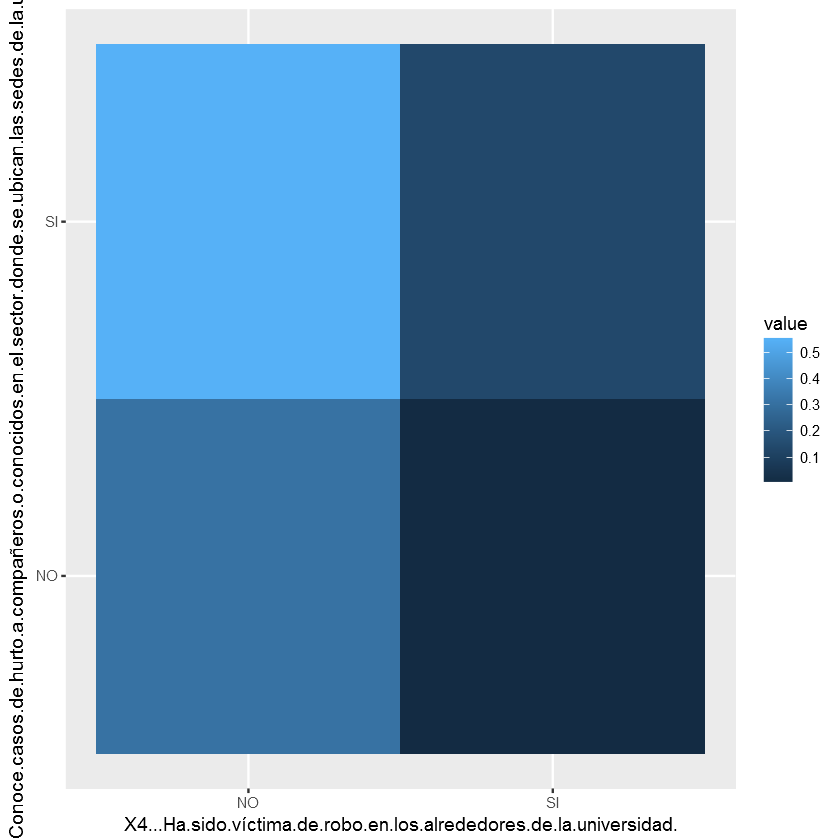

In [7]:
cross_plot(cruces[1,1],cruces[2,1])

Warning message:
In chisq.test(table(data[c(cross_1, cross_2)])): Chi-squared approximation may be incorrect


	Pearson's Chi-squared test

data:  table(data[c(cross_1, cross_2)])
X-squared = 31.836, df = 4, p-value = 2.067e-06



Warning message:
In chisq.test(table(data[c(cross_1, cross_2)])): Chi-squared approximation may be incorrect

[1] "Posiblemente esten relacionadas (no independientes)"
                                                                          X7...Cómo.califica.el.espacio.público.en.el.entorno.universitario.
X3...Se.siente.seguro.en.el.entorno.cercano.a.las.sedes.de.la.universidad.       BUENO
                                                                        NO 0.040650407
                                                                        SI 0.406504065
                                                                          X7...Cómo.califica.el.espacio.público.en.el.entorno.universitario.
X3...Se.siente.seguro.en.el.entorno.cercano.a.las.sedes.de.la.universidad. Inseguridad en el sector basuras al rededor de la universidad
                                                                        NO                                                   0.000000000
                                                                        SI                                                   

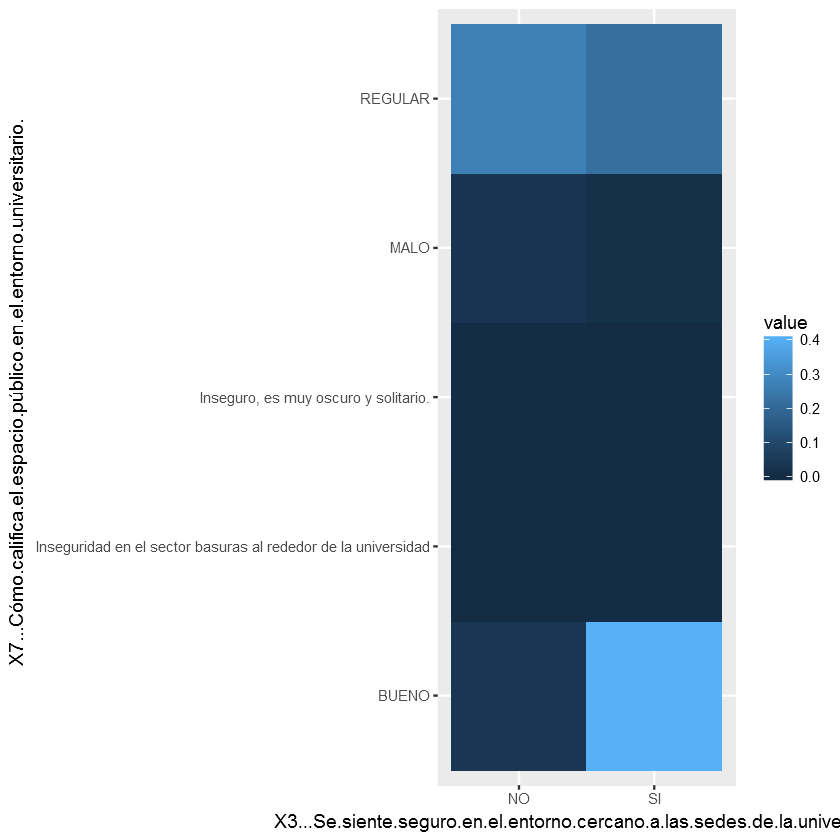

In [8]:
cross_plot(cruces[1,2],cruces[2,2])

Warning message:
In chisq.test(table(data[c(cross_1, cross_2)])): Chi-squared approximation may be incorrect


	Pearson's Chi-squared test

data:  table(data[c(cross_1, cross_2)])
X-squared = 25.302, df = 4, p-value = 4.375e-05



Warning message:
In chisq.test(table(data[c(cross_1, cross_2)])): Chi-squared approximation may be incorrect

[1] "Posiblemente esten relacionadas (no independientes)"
                                                                                                                                  X7...Cómo.califica.el.espacio.público.en.el.entorno.universitario.
X8...Considera.que.los.espacios.para.caminar.o.transitar.en.el.sector.donde.se.ubican.las.sedes.de.la.universidad.son.suficientes.       BUENO
                                                                                                                                NO 0.138211382
                                                                                                                                SI 0.308943089
                                                                                                                                  X7...Cómo.califica.el.espacio.público.en.el.entorno.universitario.
X8...Considera.que.los.espacios.para.caminar.o.transitar.en.el.sector.donde.se.ubican.las.sedes.de.la.universidad.son.s

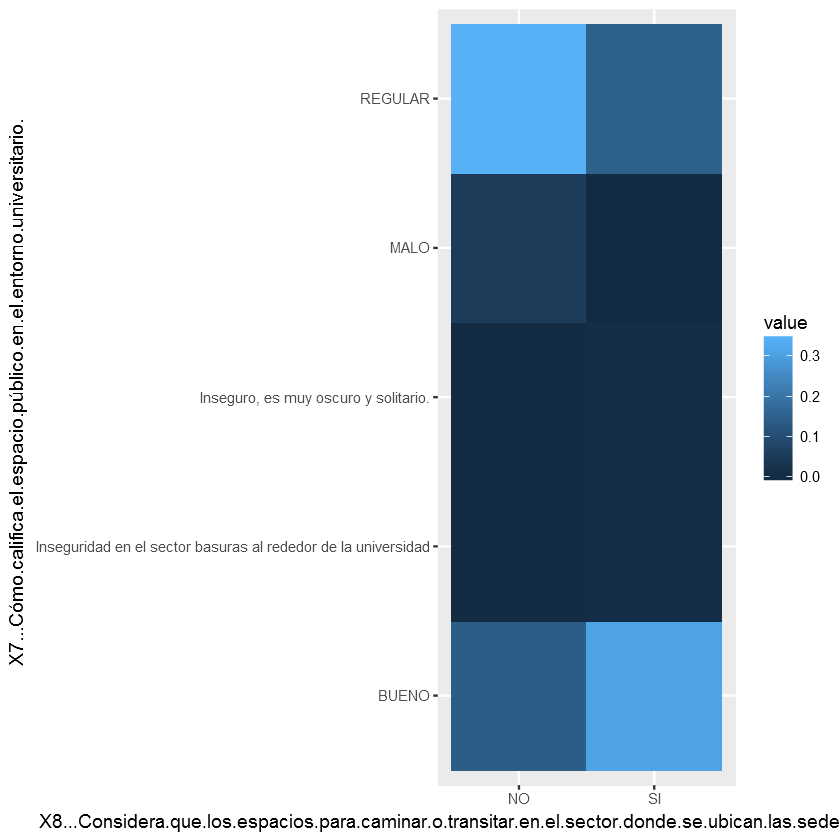

In [9]:
cross_plot(cruces[1,3],cruces[2,3])


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(data[c(cross_1, cross_2)])
X-squared = 8.6244, df = 1, p-value = 0.003317

[1] "Posiblemente esten relacionadas (no independientes)"
                                                                                                   X16...Considera.que.la.presencia.de.vendedores.informales..ambulantes..afecta.la.convivencia.de.la.institución.con.el.entorno..
X10...Considera.que.la.presencia.de.establecimientos.de.comercio.es.favorable.para.la.universidad..         NO
                                                                                                 NO 0.01626016
                                                                                                 SI 0.42276423
                                                                                                   X16...Considera.que.la.presencia.de.vendedores.informales..ambulantes..afecta.la.convivencia.de.la.institución.con.el.entorno..
X10

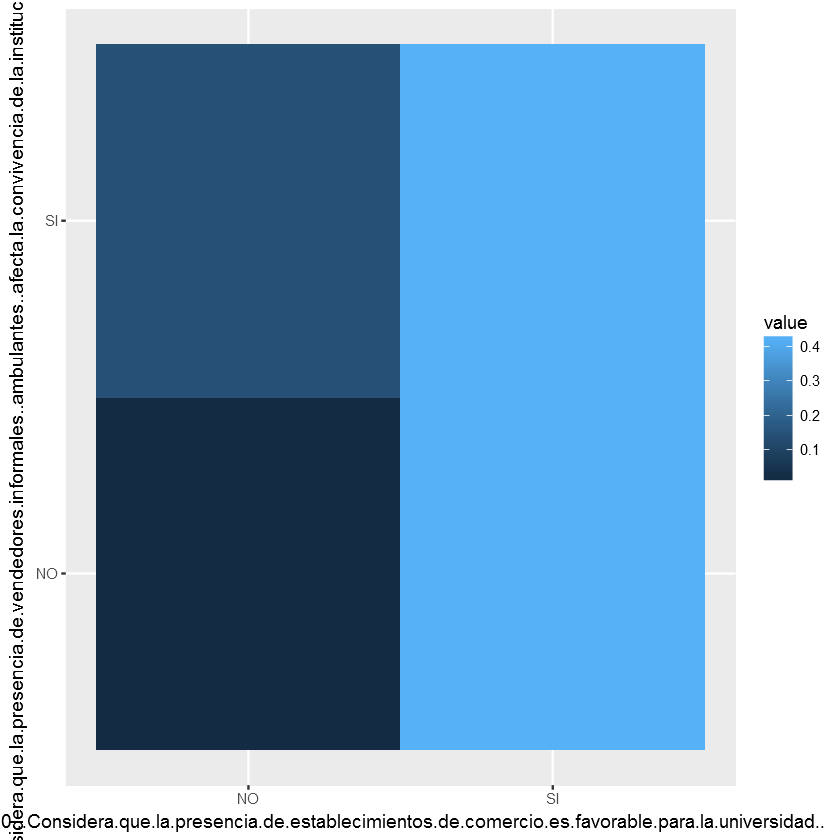

In [10]:
cross_plot(cruces[1,4],cruces[2,4])

Warning message:
In chisq.test(table(data[c(cross_1, cross_2)])): Chi-squared approximation may be incorrect


	Pearson's Chi-squared test

data:  table(data[c(cross_1, cross_2)])
X-squared = 126.24, df = 4, p-value < 2.2e-16



Warning message:
In chisq.test(table(data[c(cross_1, cross_2)])): Chi-squared approximation may be incorrect

[1] "Posiblemente esten relacionadas (no independientes)"
                                                                                                                             X22...Conoce.los.mecanismos.utilizados.por.la.universidad.para.solucionar.conflictos.con.la.comunidad.del.entorno.
X20...Conoce.actividades.o.proyectos.para.relacionarse.con.vecinos.o.comerciantes.del.sector..realizadas.por.la.universidad..            
                                                                                                                              0.008130081
                                                                                                                           NO 0.000000000
                                                                                                                           SI 0.000000000
                                                                                                                             X22...Conoce.los.mecanism

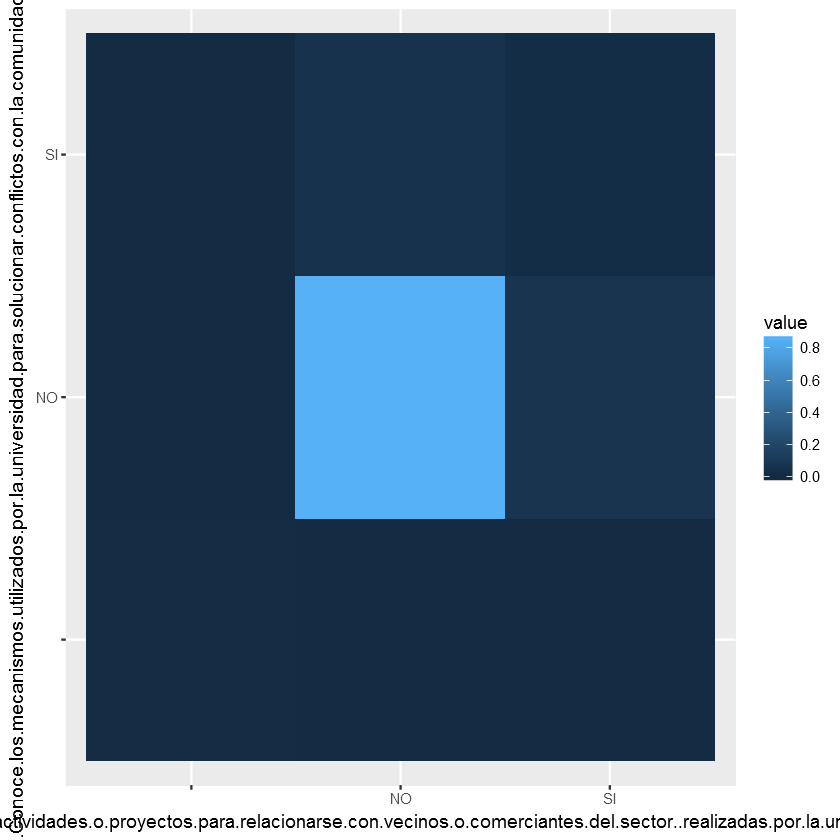

In [11]:
cross_plot(cruces[1,7],cruces[2,7])

## Nubes de palabras

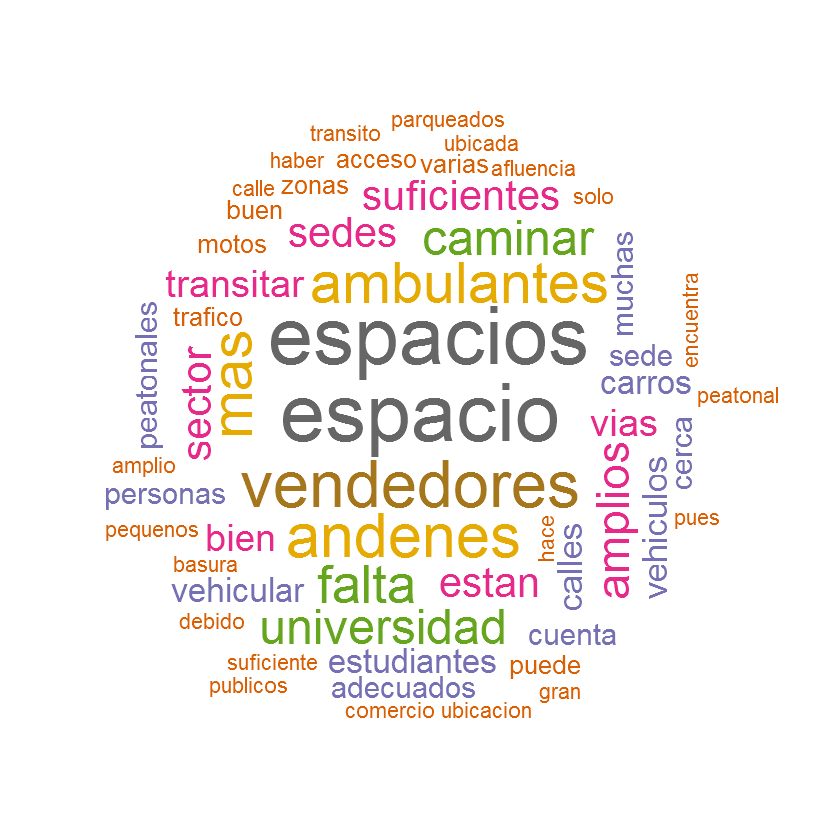

                             word freq
espacio                   espacio   18
espacios                 espacios   18
vendedores             vendedores   14
andenes                   andenes   13
ambulantes             ambulantes   12
mas                           mas   12
falta                       falta   11
caminar                   caminar   10
universidad           universidad   10
amplios                   amplios    9
estan                       estan    8
sedes                       sedes    8
suficientes           suficientes    8
sector                     sector    8
vias                         vias    7
transitar               transitar    7
bien                         bien    7
calles                     calles    6
vehicular               vehicular    6
estudiantes           estudiantes    6
carros                     carros    6
vehiculos               vehiculos    6
personas                 personas    5
sede                         sede    5
muchas                   

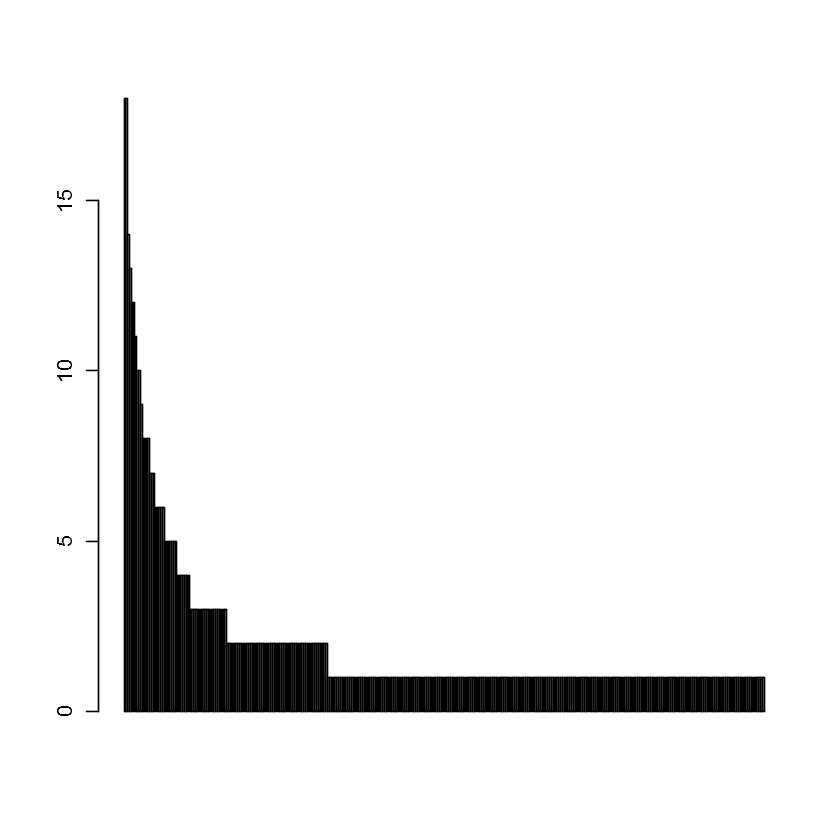

In [12]:
nub_pal(9)

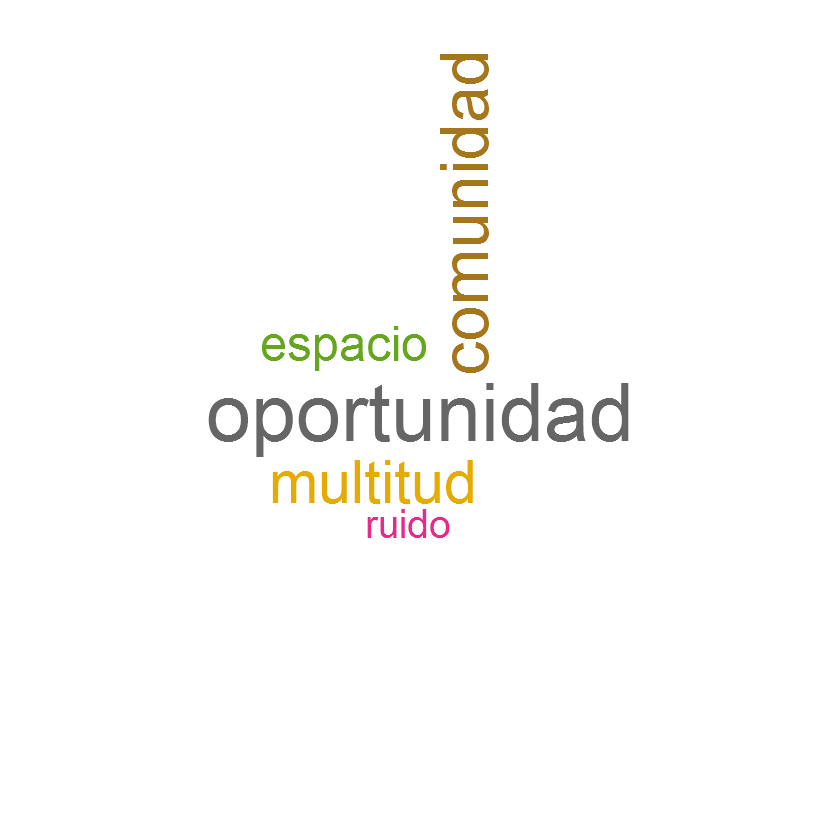

                       word freq
oportunidad     oportunidad   65
comunidad         comunidad   52
multitud           multitud   46
espacio             espacio   36
ruido                 ruido   27
suciedad           suciedad    1
bares                 bares    1
estudiantes     estudiantes    1
indisciplina   indisciplina    1
inseguridad     inseguridad    1
fotocopias       fotocopias    1
jaja                   jaja    1
accesibilidad accesibilidad    1
conseguir         conseguir    1
consumo             consumo    1
cosas                 cosas    1
dia                     dia    1
importantes     importantes    1
lejos                 lejos    1
tan                     tan    1
tendriamos       tendriamos    1
trasnladarmos trasnladarmos    1


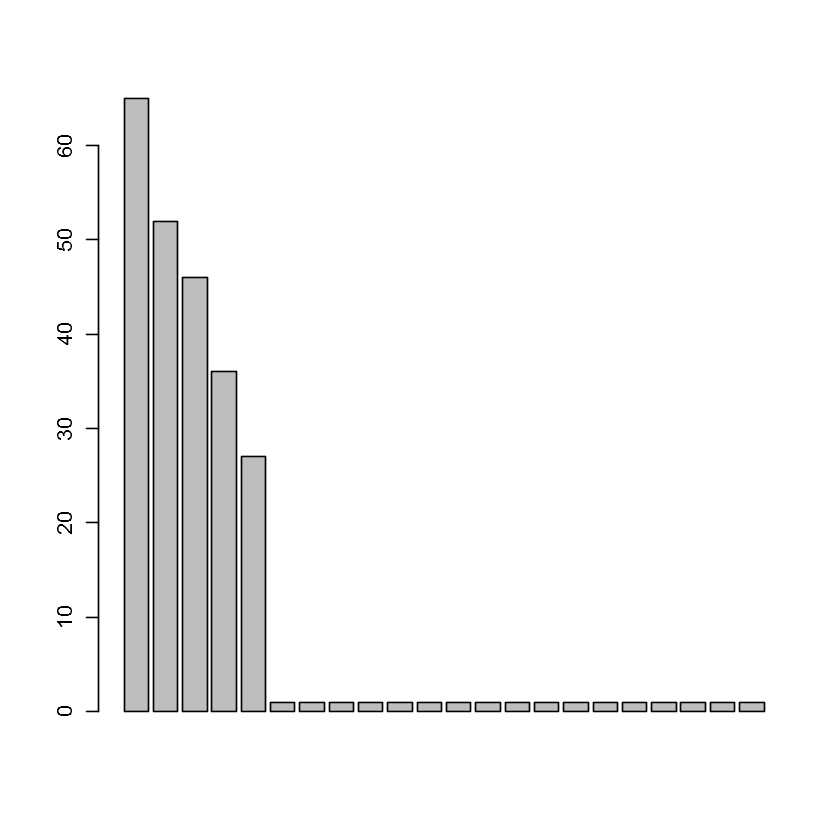

In [13]:
nub_pal(11)

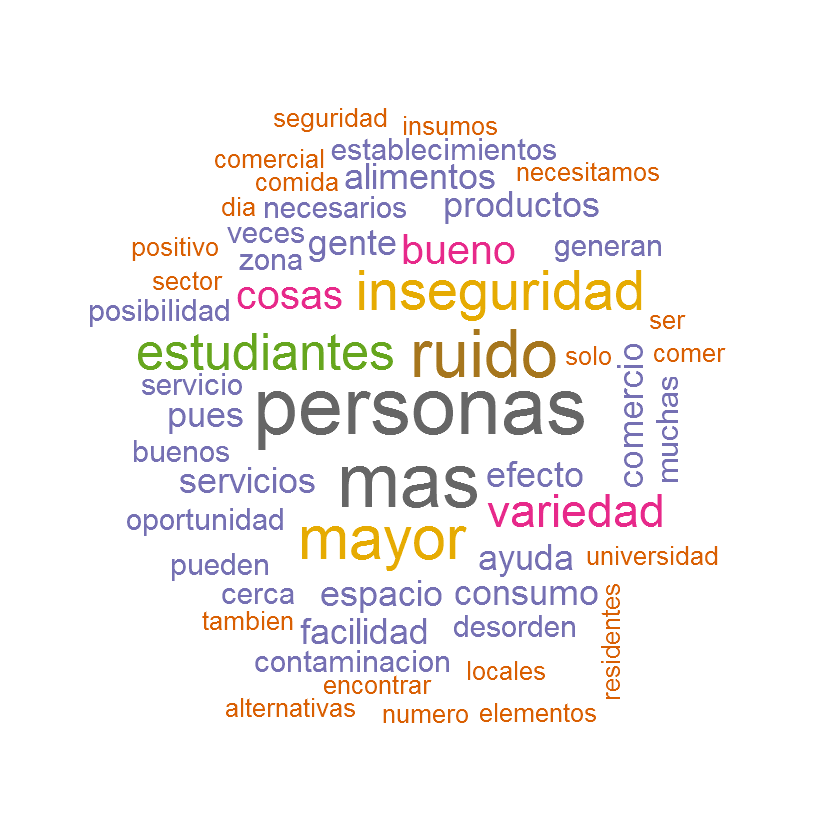

                             word freq
personas                 personas   14
mas                           mas   13
ruido                       ruido   11
mayor                       mayor   10
inseguridad           inseguridad    9
estudiantes           estudiantes    8
variedad                 variedad    7
bueno                       bueno    6
cosas                       cosas    6
servicios               servicios    5
ayuda                       ayuda    5
espacio                   espacio    5
comercio                 comercio    5
gente                       gente    5
facilidad               facilidad    5
consumo                   consumo    5
productos               productos    5
efecto                     efecto    5
pues                         pues    5
alimentos               alimentos    5
necesarios             necesarios    4
contaminacion       contaminacion    4
desorden                 desorden    4
zona                         zona    4
oportunidad           opo

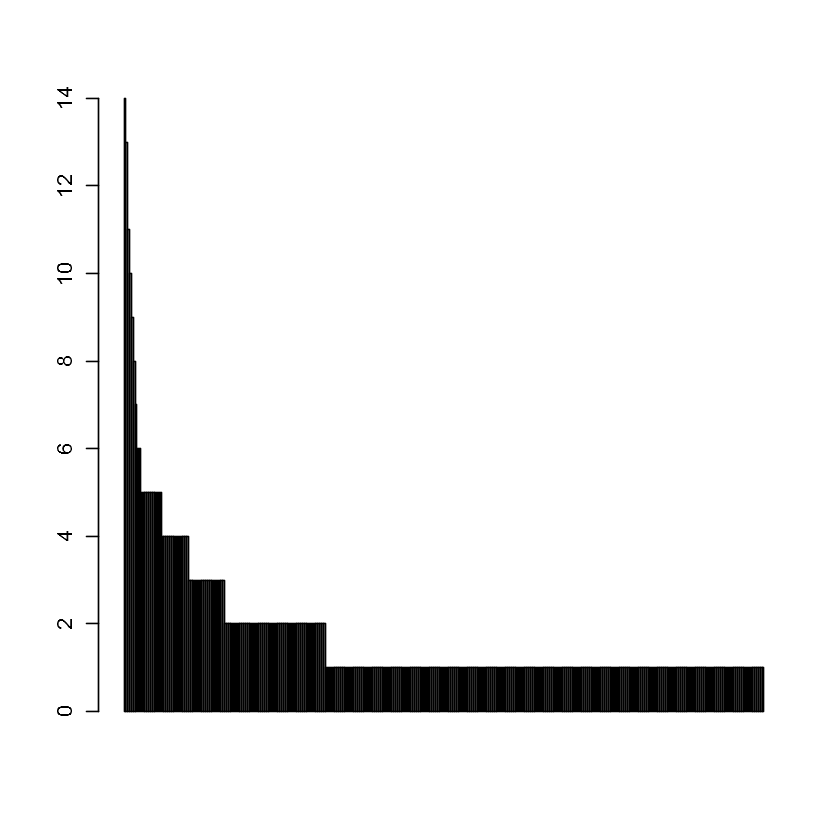

In [14]:
nub_pal(13)

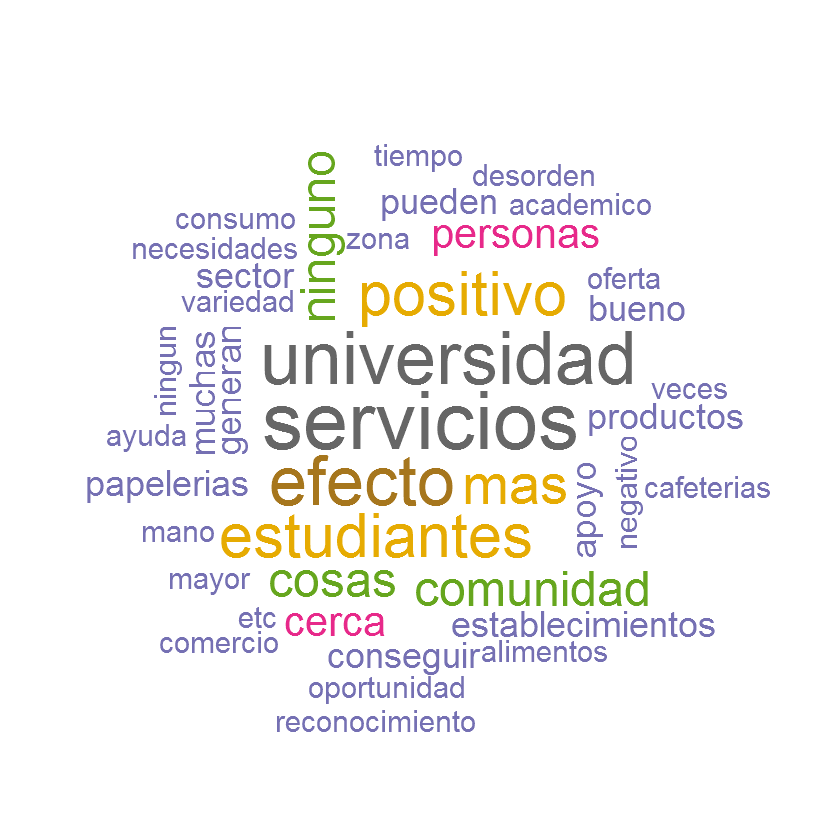

                             word freq
servicios               servicios   11
universidad           universidad   10
efecto                     efecto    9
estudiantes           estudiantes    8
positivo                 positivo    8
mas                           mas    7
ninguno                   ninguno    6
cosas                       cosas    6
comunidad               comunidad    6
personas                 personas    5
cerca                       cerca    5
pueden                     pueden    4
apoyo                       apoyo    4
generan                   generan    4
sector                     sector    4
conseguir               conseguir    4
productos               productos    4
establecimientos establecimientos    4
muchas                     muchas    4
papelerias             papelerias    4
bueno                       bueno    4
negativo                 negativo    3
academico               academico    3
alimentos               alimentos    3
variedad                 

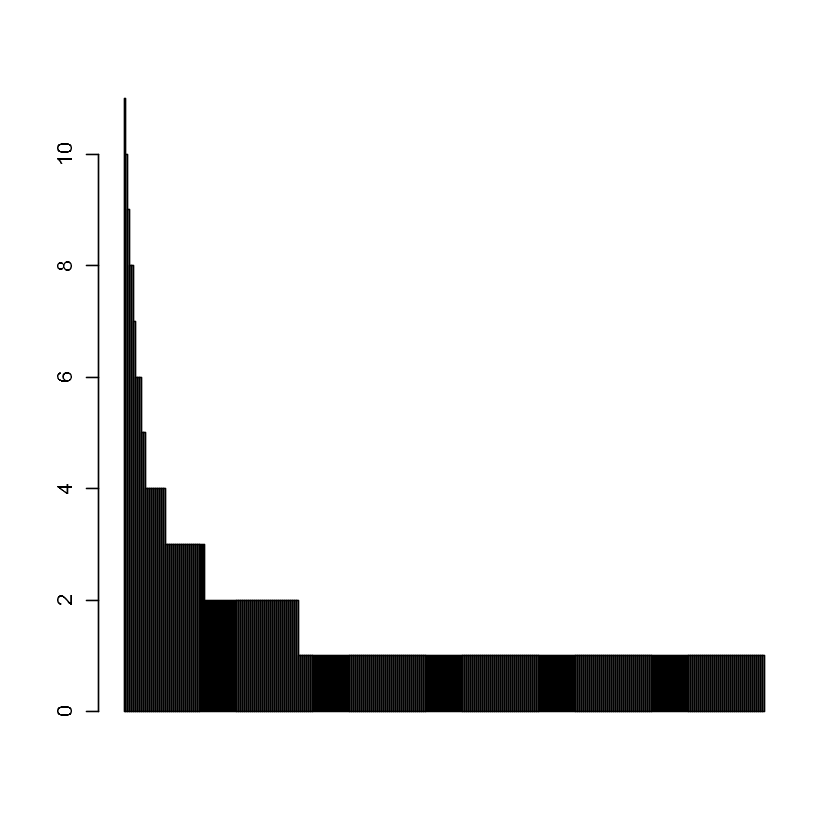

In [15]:
nub_pal(14)

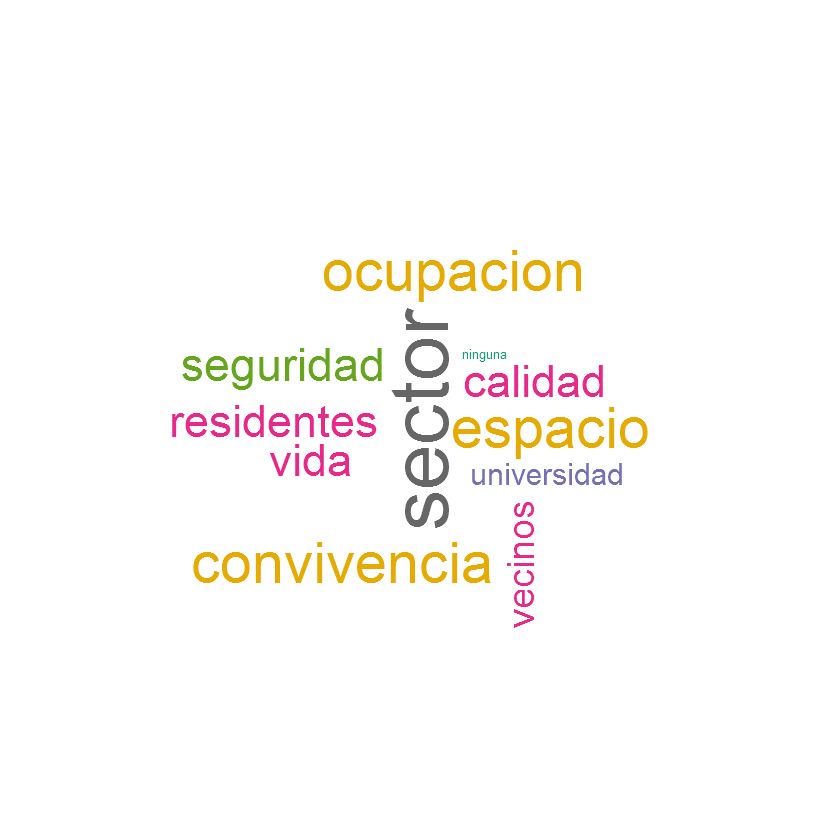

                   word freq
sector           sector   91
espacio         espacio   60
ocupacion     ocupacion   60
convivencia convivencia   60
seguridad     seguridad   46
calidad         calidad   45
residentes   residentes   45
vida               vida   45
vecinos         vecinos   36
universidad universidad   25
ninguna         ninguna    3
anteriores   anteriores    1
ninguno         ninguno    1
animales       animales    1
bien               bien    1
cerca             cerca    1
parecen         parecen    1
ubicados       ubicados    1
afecta           afecta    1
bares             bares    1
caso               caso    1
desempeno     desempeno    1
estudiante   estudiante    1
afectacion   afectacion    1
motivo           motivo    1
parece           parece    1


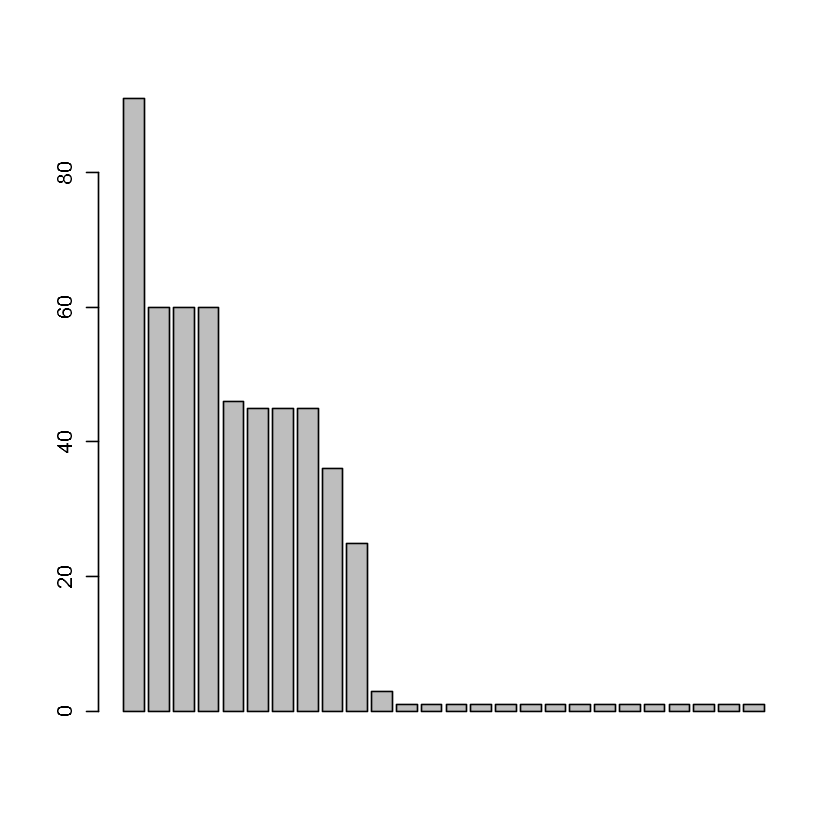

In [16]:
nub_pal(15)

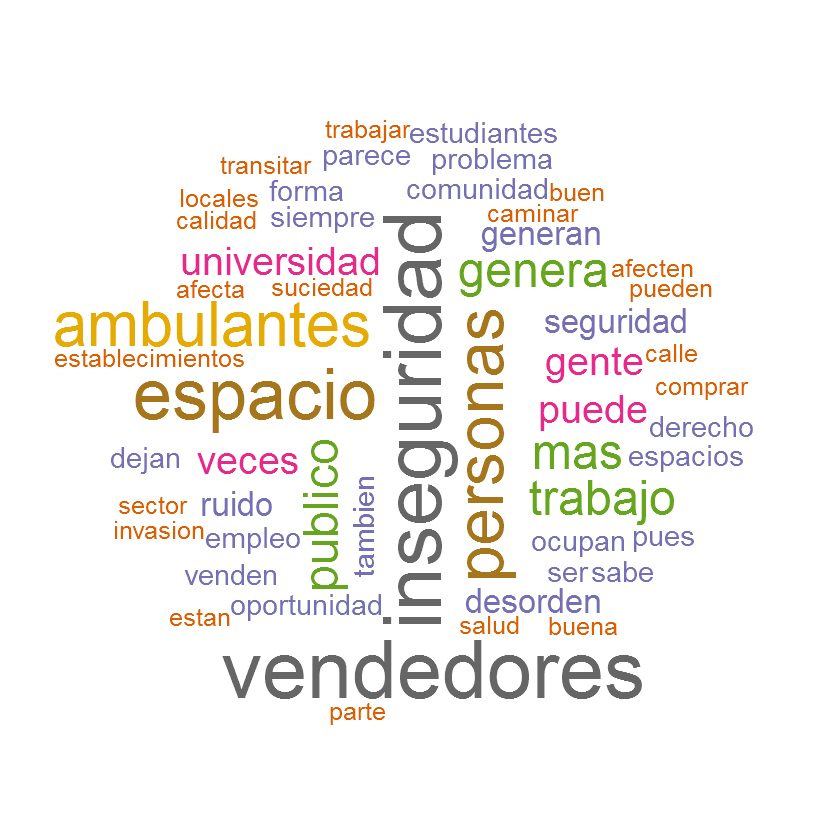

                             word freq
inseguridad           inseguridad   15
vendedores             vendedores   15
espacio                   espacio   13
personas                 personas   12
ambulantes             ambulantes   11
publico                   publico    8
genera                     genera    8
trabajo                   trabajo    8
mas                           mas    8
puede                       puede    6
universidad           universidad    6
veces                       veces    6
gente                       gente    6
seguridad               seguridad    5
desorden                 desorden    5
generan                   generan    5
ruido                       ruido    5
ocupan                     ocupan    4
comunidad               comunidad    4
siempre                   siempre    4
empleo                     empleo    4
oportunidad           oportunidad    4
venden                     venden    4
espacios                 espacios    4
sabe                     

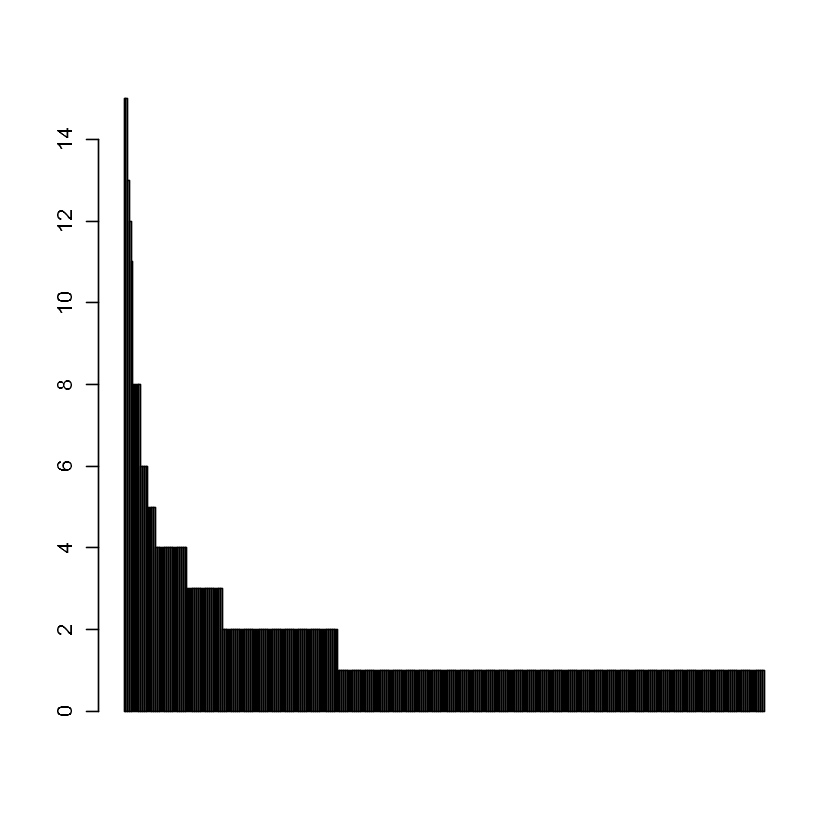

In [17]:
nub_pal(17)

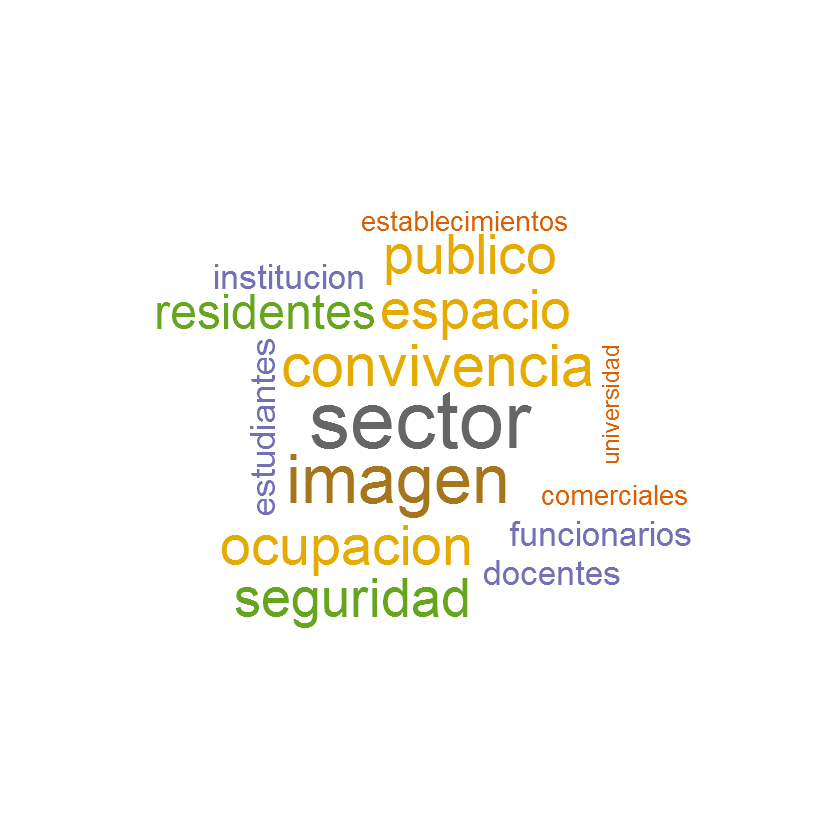

                             word freq
sector                     sector  130
imagen                     imagen  107
convivencia           convivencia   90
espacio                   espacio   83
ocupacion               ocupacion   83
publico                   publico   83
seguridad               seguridad   81
residentes             residentes   69
docentes                 docentes   46
estudiantes           estudiantes   46
funcionarios         funcionarios   46
institucion           institucion   46
comerciales           comerciales   32
establecimientos establecimientos   32
universidad           universidad   24
ninguna                   ninguna    2
afectan                   afectan    2
ninguno                   ninguno    2
anteriores             anteriores    1
afecta                     afecta    1
afecten                   afecten    1
parece                     parece    1
criterio                 criterio    1
acuerdo                   acuerdo    1
ambulantes             am

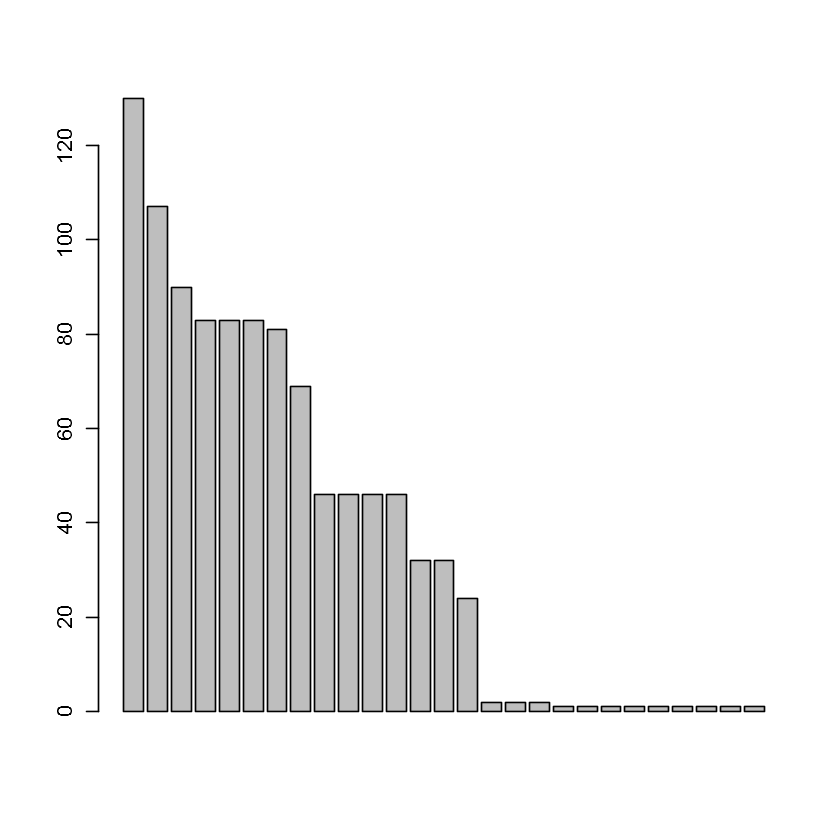

In [18]:
nub_pal(18)

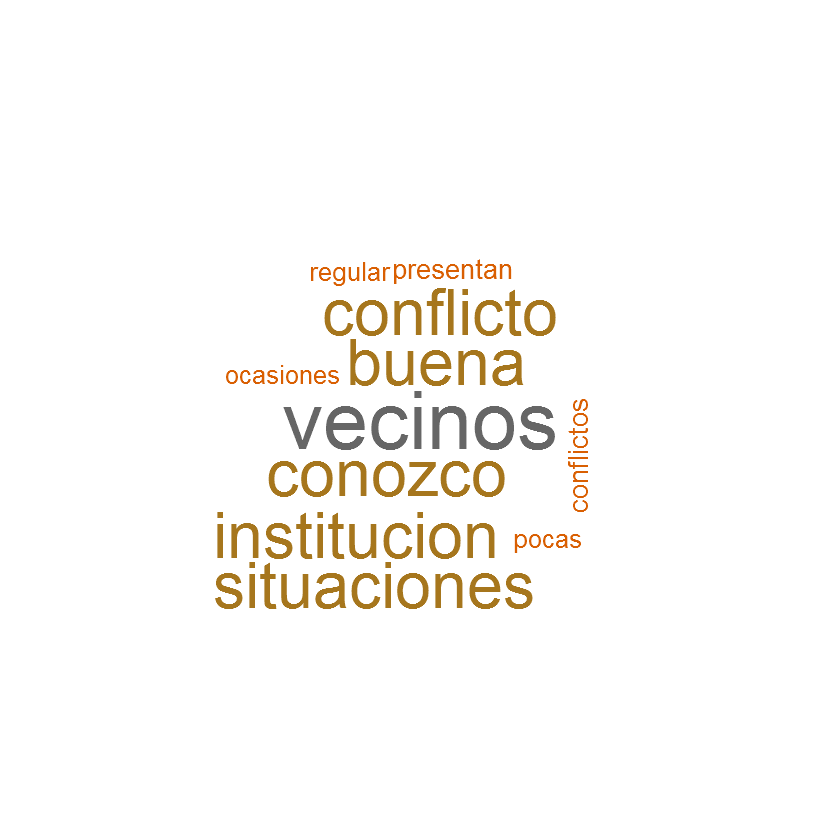

                         word freq
vecinos               vecinos  121
conozco               conozco   94
buena                   buena   93
conflicto           conflicto   93
institucion       institucion   93
situaciones       situaciones   93
conflictos         conflictos   28
presentan           presentan   28
ocasiones           ocasiones   26
pocas                   pocas   26
regular               regular   26
frecuentemente frecuentemente    2
mala                     mala    2


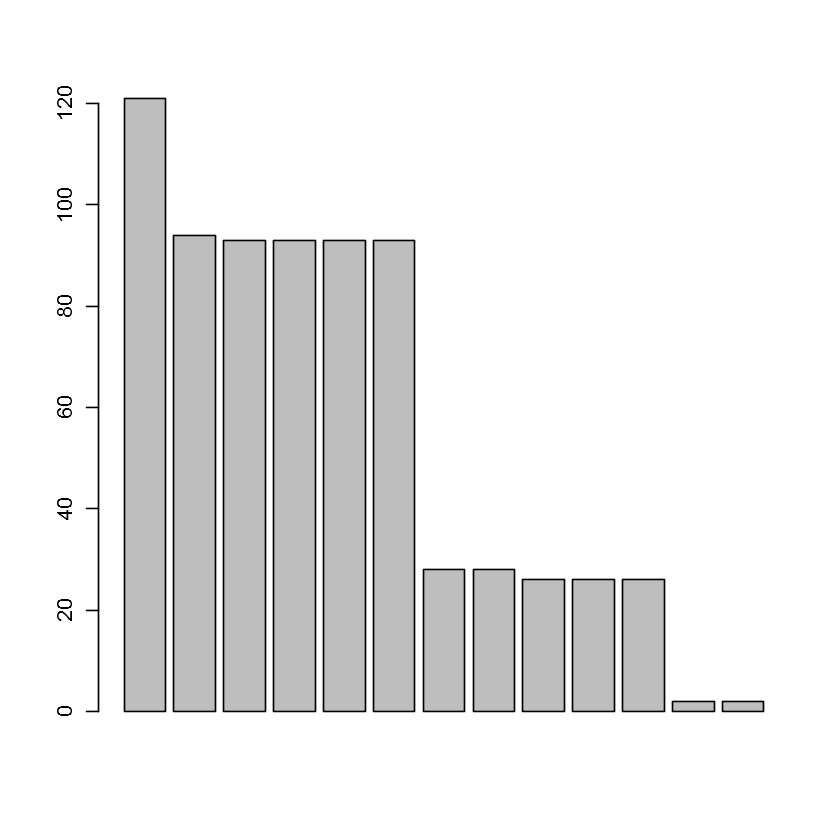

In [19]:
nub_pal(19)

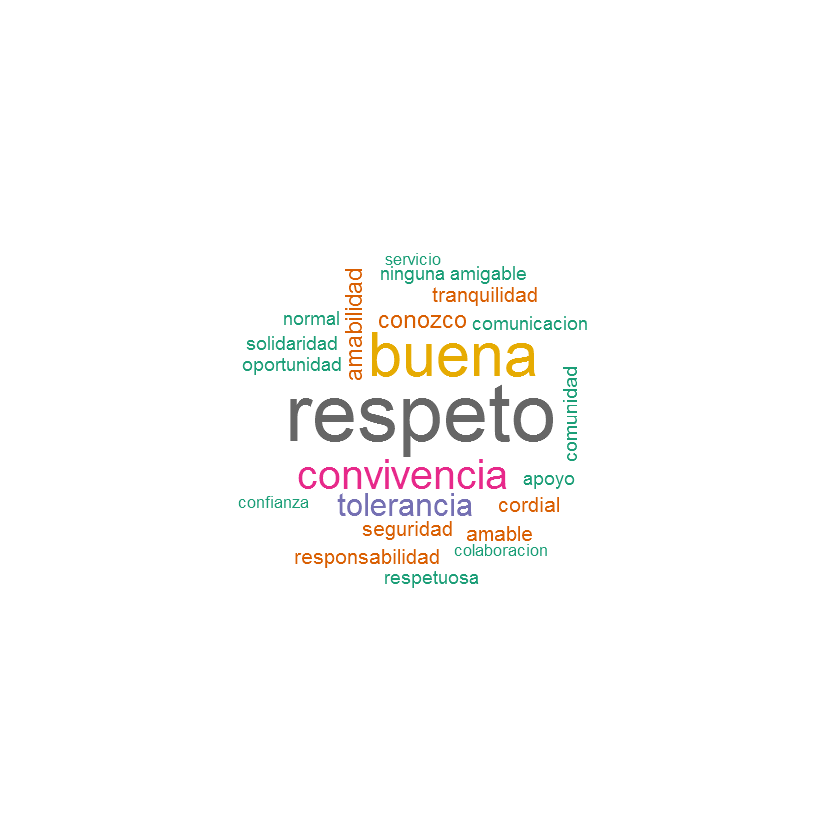

                             word freq
respeto                   respeto   32
buena                       buena   23
convivencia           convivencia   14
tolerancia             tolerancia   10
amabilidad             amabilidad    6
conozco                   conozco    6
seguridad               seguridad    5
tranquilidad         tranquilidad    5
responsabilidad   responsabilidad    5
amable                     amable    5
cordial                   cordial    5
comunicacion         comunicacion    4
ninguna                   ninguna    4
oportunidad           oportunidad    4
apoyo                       apoyo    4
amigable                 amigable    4
comunidad               comunidad    4
respetuosa             respetuosa    4
solidaridad           solidaridad    4
normal                     normal    4
colaboracion         colaboracion    3
confianza               confianza    3
servicio                 servicio    3
negocio                   negocio    2
distante                 

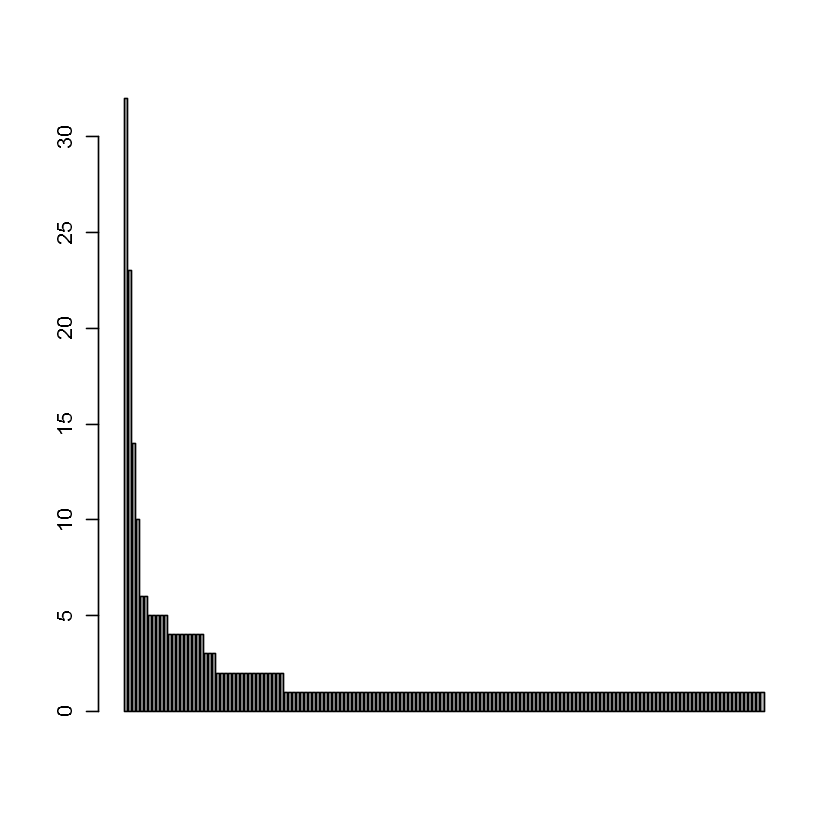

In [20]:
nub_pal(23)

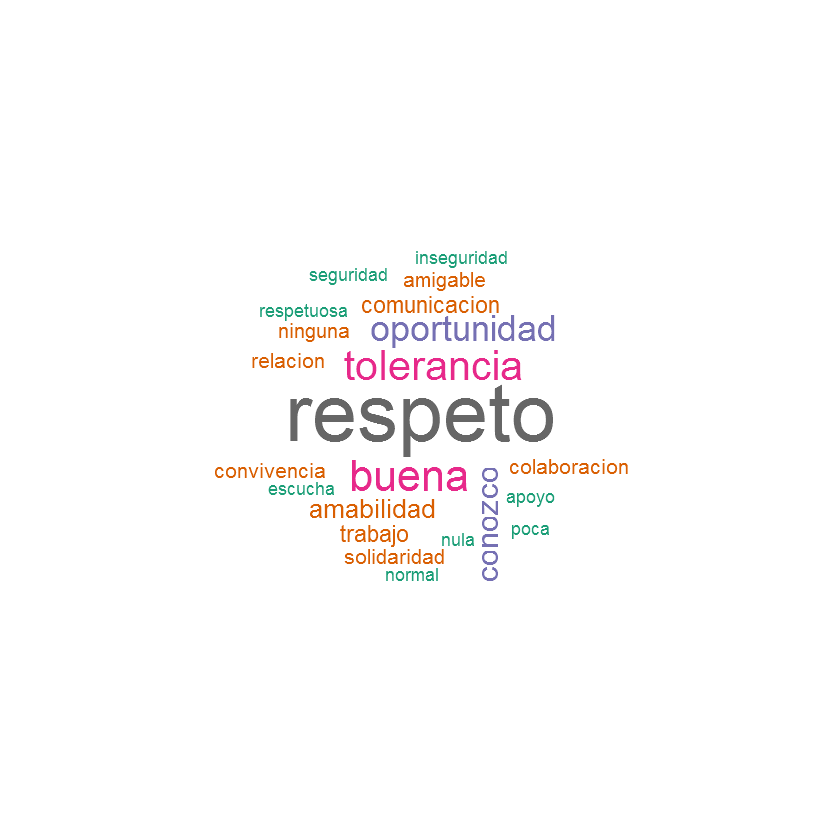

                             word freq
respeto                   respeto   28
buena                       buena   13
tolerancia             tolerancia   12
oportunidad           oportunidad   10
conozco                   conozco    8
amabilidad             amabilidad    6
comunicacion         comunicacion    5
trabajo                   trabajo    5
ninguna                   ninguna    4
solidaridad           solidaridad    4
amigable                 amigable    4
colaboracion         colaboracion    4
relacion                 relacion    4
convivencia           convivencia    4
nula                         nula    3
apoyo                       apoyo    3
seguridad               seguridad    3
inseguridad           inseguridad    3
poca                         poca    3
normal                     normal    3
escucha                   escucha    3
respetuosa             respetuosa    3
interaccion           interaccion    2
desconocida           desconocida    2
inexistente           ine

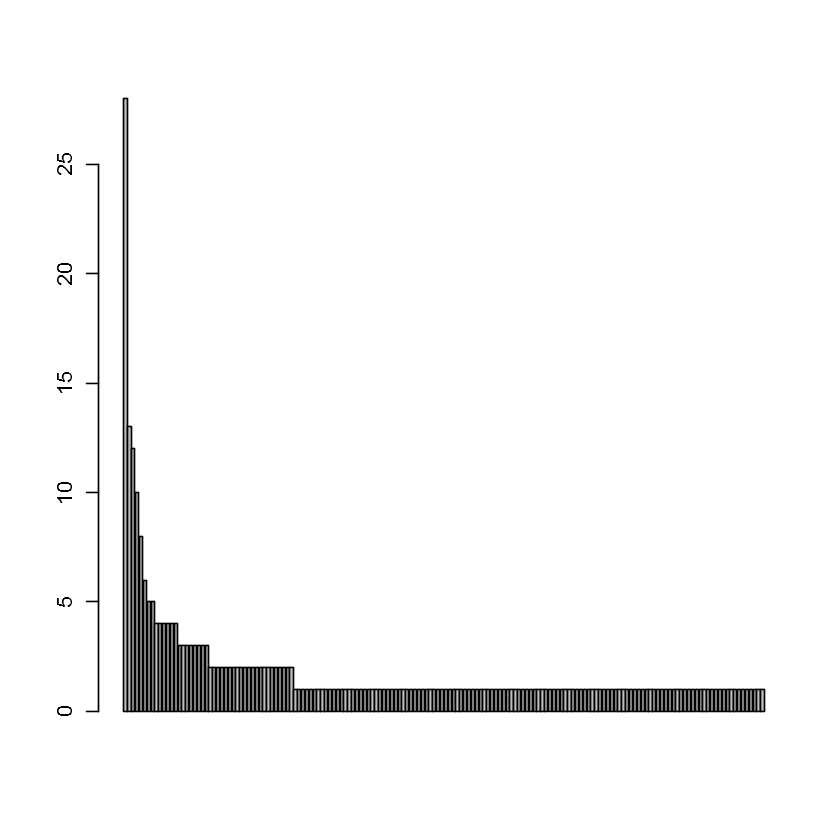

In [21]:
nub_pal(24)

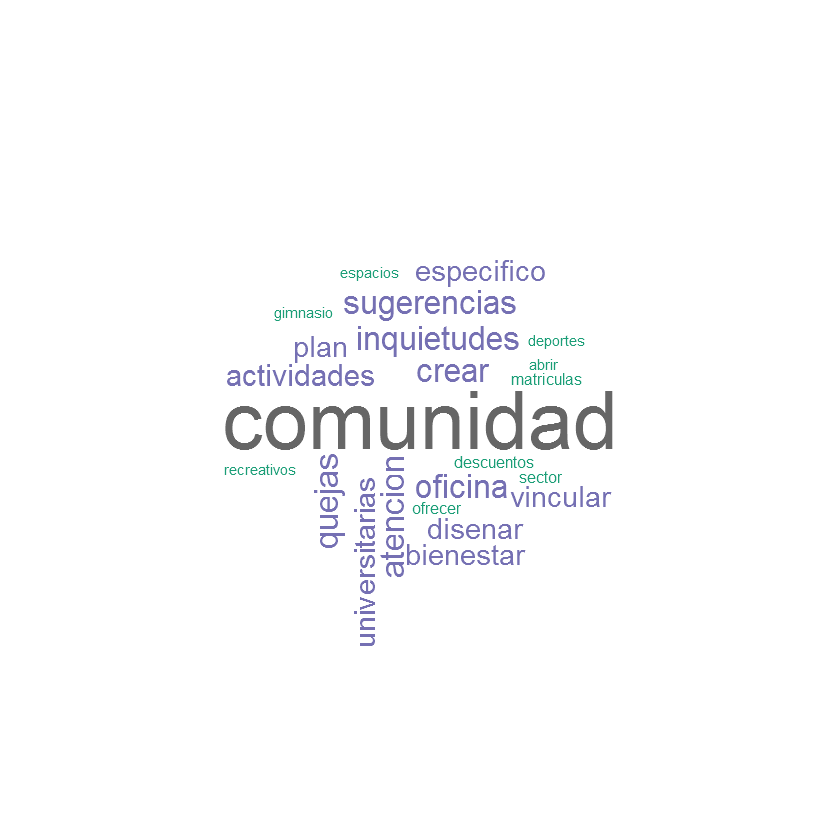

                           word freq
comunidad             comunidad  224
atencion               atencion   72
crear                     crear   72
inquietudes         inquietudes   72
oficina                 oficina   72
quejas                   quejas   72
sugerencias         sugerencias   72
actividades         actividades   61
bienestar             bienestar   60
disenar                 disenar   60
especifico           especifico   60
plan                       plan   60
vincular               vincular   60
universitarias   universitarias   59
descuentos           descuentos   18
matriculas           matriculas   18
ofrecer                 ofrecer   18
sector                   sector   18
abrir                     abrir   14
deportes               deportes   14
espacios               espacios   14
gimnasio               gimnasio   14
recreativos         recreativos   14
ninguna                 ninguna    2
centro                   centro    1
claro                     claro    1
e

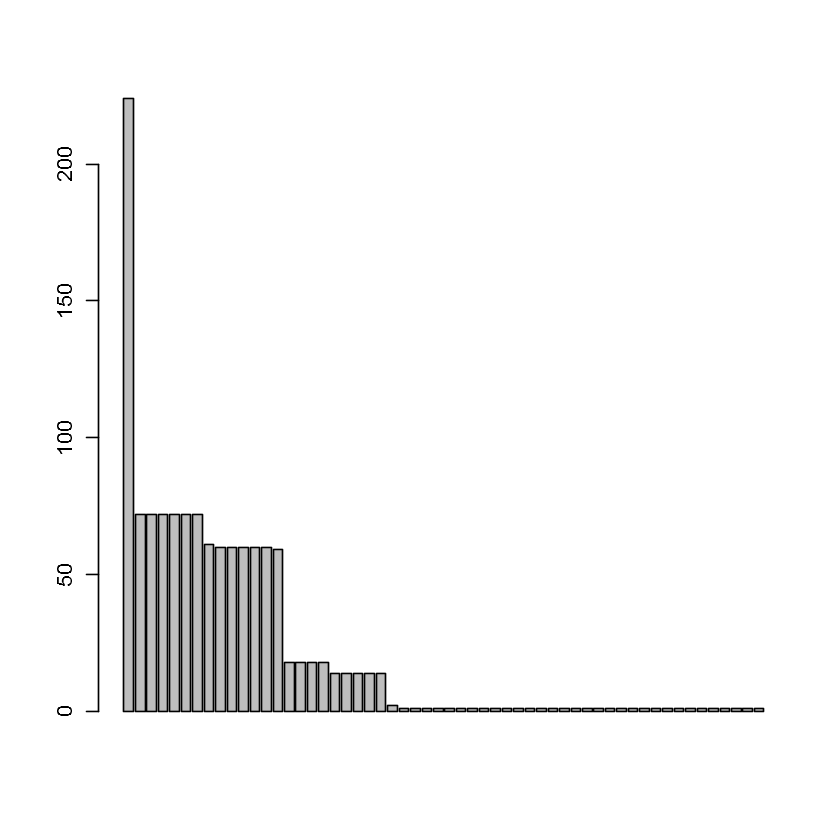

In [22]:
nub_pal(25)

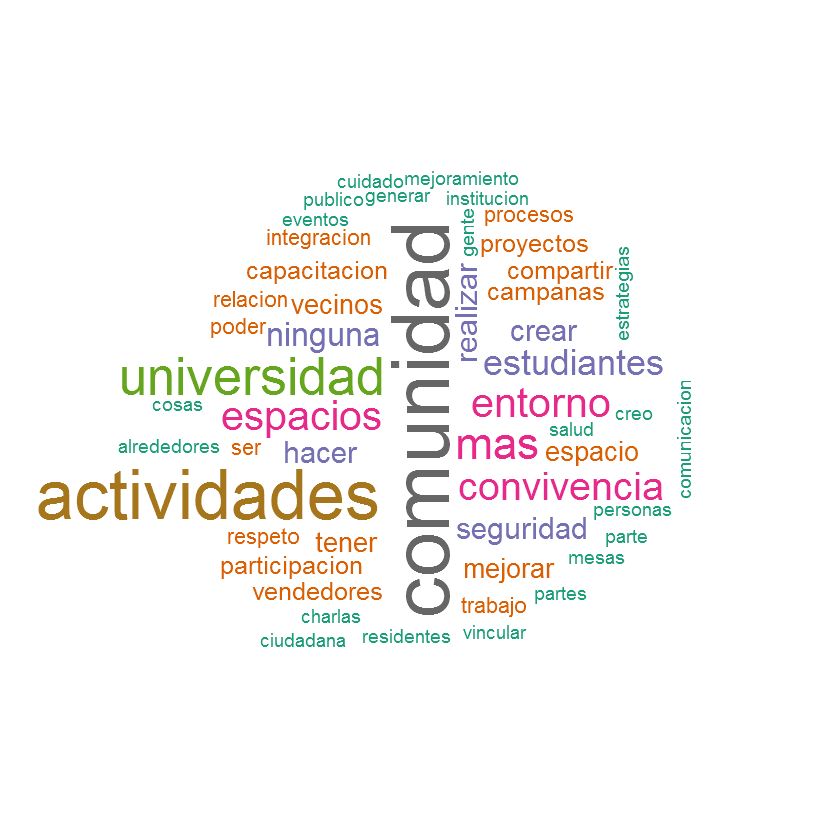

                           word freq
comunidad             comunidad   25
actividades         actividades   21
universidad         universidad   15
mas                         mas   12
entorno                 entorno   11
espacios               espacios   11
convivencia         convivencia   10
estudiantes         estudiantes    9
ninguna                 ninguna    8
hacer                     hacer    7
realizar               realizar    7
seguridad             seguridad    7
crear                     crear    7
vecinos                 vecinos    6
tener                     tener    6
mejorar                 mejorar    6
espacio                 espacio    6
capacitacion       capacitacion    5
campanas               campanas    5
participacion     participacion    5
vendedores           vendedores    5
compartir             compartir    5
proyectos             proyectos    5
respeto                 respeto    4
integracion         integracion    4
trabajo                 trabajo    4
r

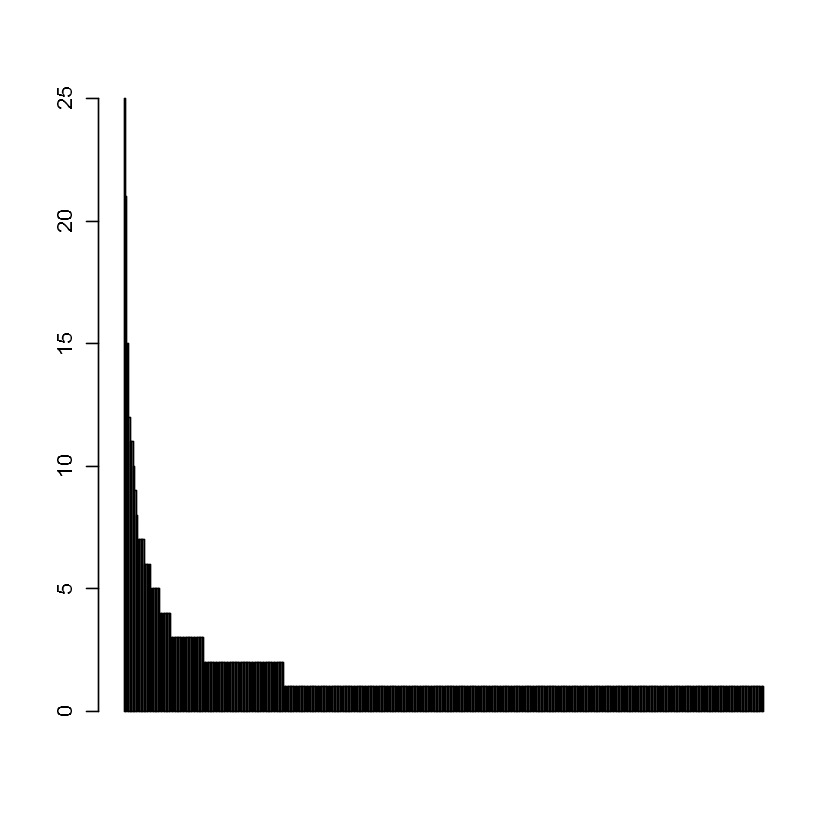

In [23]:
nub_pal(26)